# Analisis univariable de la data historica

En esta sección se presentará un analisis en forma de histograma de las variables de interés pertenecientes a la data historica, que permitan visualizar patrones, asi como su distribución asociada.

Para ello utilizaremos las librerías **pandas**, **numpy**, **os**, **glob**, **matplotlib** y **collections**. 

In [1]:
"""
1- Importar librerias
2- Obtener nombres de archivos de la data historica
3- Leer data desde los archivos
4- Efectuar Analisis en forma de histograma
"""

# Importamos las librerias
import pandas as pd
import os, glob
import matplotlib.pyplot as plt
import numpy as np

# Obtenemos los archivos que contienen la data
historic_files = glob.glob(os.path.join(os.getcwd()+ '/01-20190312T042227Z-001/01/Datos GPS/Datos GPS 200x200 (2018)', "*.csv"))

# Leemos la data desde los archivos
historic_data_headers = ["id_Arco", "id_Cuadrante", "Nombre_Comuna", "Fecha", "Hora", "Velocidad_Promedio", "N_puntos", "N_vehiculos"]
historic_data = pd.DataFrame(columns=historic_data_headers)

for file in historic_files:
    data = pd.read_csv(file, delimiter=';')
    historic_data = historic_data.append(data)

# Verificamos que la data se encuentre en el DataFrame
historic_data.shape



(2165713, 8)

In [2]:
#Visualizacion de las 10 primeras filas de datos
historic_data.head(10)

,id_Arco,id_Cuadrante,Nombre_Comuna,Fecha,Hora,Velocidad_Promedio,N_puntos,N_vehiculos
0,25751767,14413,Lampa,13-11-2018,15:15:00,28,1,1
1,24444592,41659,Santiago,23-08-2018,18:00:00,18,1,1
2,30679885,7608,Colina,16-04-2018,11:30:00,57,1,1
3,388587252,34497,Renca,14-05-2018,10:15:00,102,1,1
4,194278123,34528,Providencia,02-02-2018,07:00:00,5,1,1
5,255327796,6585,Lampa,04-10-2018,12:15:00,52,1,1
6,30679885,12374,Colina,11-10-2018,11:15:00,113,1,1
7,42118505,38254,Santiago,18-01-2018,13:30:00,63,1,1
8,23973708,33818,Independencia,24-10-2018,16:00:00,68,1,1
9,47566417,25638,Quilicura,29-06-2018,10:15:00,14,1,1


### Analisis de cuadrantes

Histograma de los cuadrantes mas transitados por la muestra de flota.

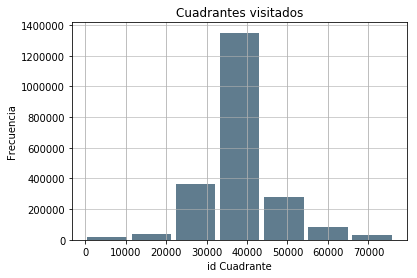

In [3]:
# Se obtiene la data de los cuadrantes
uni_data = historic_data["id_Cuadrante"]

# Plot del histograma, la cantidad de bins se puede cambiar para visualizar de distinta manera los datos
uni_data.plot.hist(grid=True, bins=7, rwidth=0.9, color='#607c8e')
plt.title('Cuadrantes visitados')
plt.xlabel('id Cuadrante')
plt.ylabel('Frecuencia')
plt.grid(axis='y', alpha=0.75)

### Analisis de comunas

Histograma de las comunas mas transitadas por la muestra de la flota.

Text(0.5,1,'Comunas transitadas')

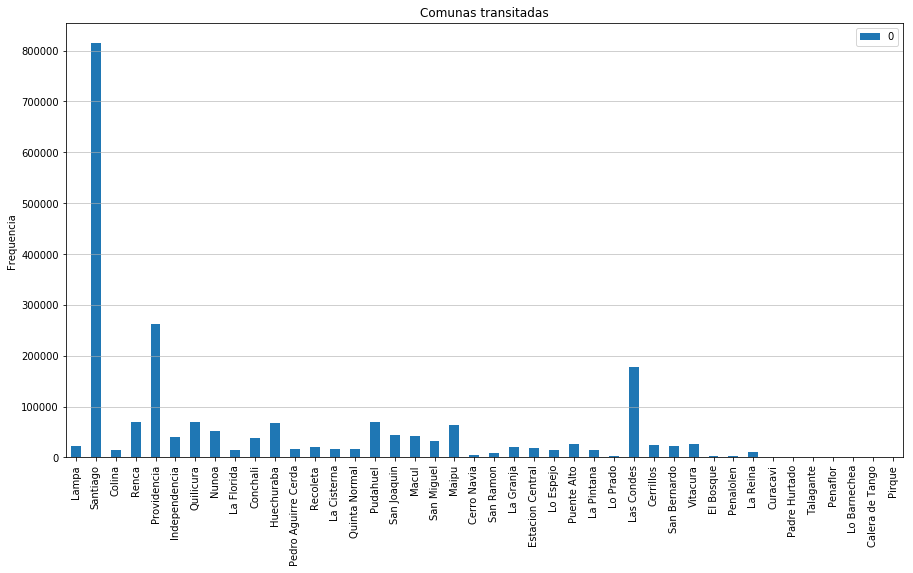

In [4]:
# Utilizaremos la funcion counter del modulo Collections
from collections import Counter

# Obtenemos la data de las comunas transitadas
uni_data = historic_data["Nombre_Comuna"]

# Diccionario de frecuencias por comuna, esto es necesario para plotear histogramas con variables tipo string
counter = Counter(uni_data)

# Construccion de un dataframe en base al diccionario definido anteriormente y plotteo de la data
df = pd.DataFrame.from_dict(counter, orient='index')
df.plot.bar(figsize=(15, 8))
plt.grid(axis='y', alpha=0.75)
plt.ylabel('Frequencia')
plt.title("Comunas transitadas")

### Analisis de fechas

Histograma que muestra la frecuencia por mes en que se realizaron recorridos por los vehiculos de la flota de muestra.

Text(0.5,1,'Transito de flota por mes')

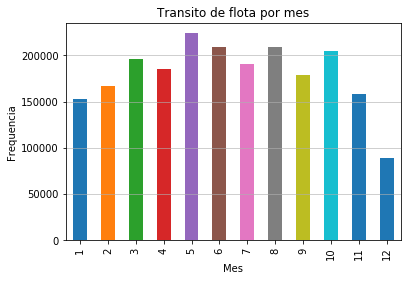

In [5]:
# Transformamos las fechas a datetime
historic_data["Fecha"] = pd.to_datetime(historic_data["Fecha"])    

# Obtenemos la data de las fechas
uni_data = historic_data["Fecha"]

# Agrupamos los datos por mes y ploteamos
uni_data.groupby(uni_data.dt.month).count().plot(kind="bar")
plt.grid(axis='y', alpha=0.75)
plt.ylabel('Frequencia')
plt.xlabel("Mes")
plt.title("Transito de flota por mes")

### Analisis de horas

Histograma de las horas en que se efectuaron recorridos medidos para la flota de muestra.

Text(0.5,1,'Transito de flota por hora')

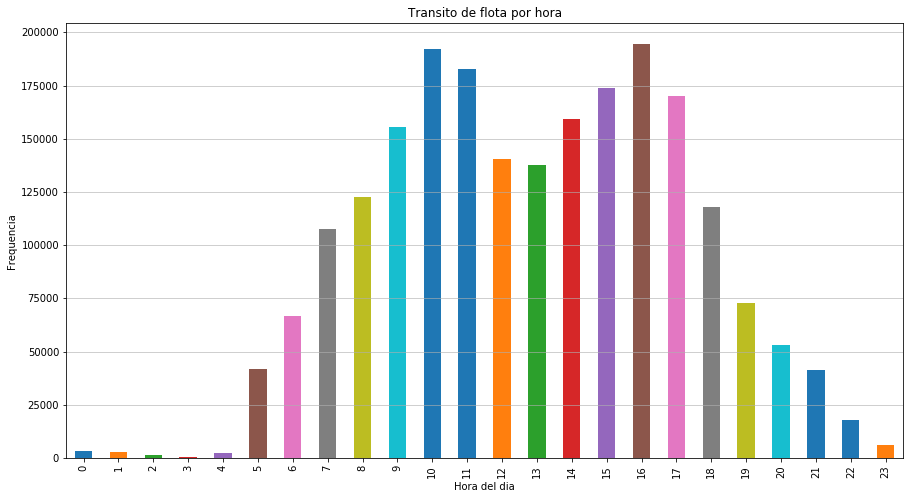

In [6]:
# Transformamos las horas a datetime
historic_data["Hora"] = pd.to_datetime(historic_data["Hora"])

# Obtenemos los datos por hora
uni_data = historic_data["Hora"]

# Agrupamos los datos por hora y ploteamos
uni_data.groupby(uni_data.dt.hour).count().plot.bar(figsize=(15, 8))
plt.grid(axis='y', alpha=0.75)
plt.ylabel('Frequencia')
plt.xlabel("Hora del dia")
plt.title("Transito de flota por hora")

### Analisis de velocidades

Histograma que muestra las velocidades mas frecuentes medidas en la flota de muestra.

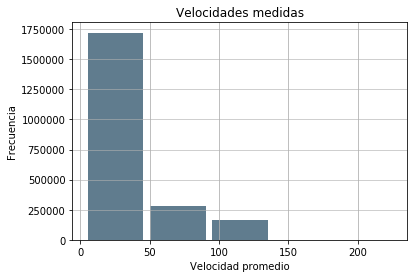

In [7]:
# Obtenemos los datos de velocidades
uni_data = historic_data["Velocidad_Promedio"]

# Ploteo de las velocidades
uni_data.plot.hist(grid=True, bins=5, rwidth=0.9, color='#607c8e')
plt.title("Velocidades medidas")
plt.xlabel('Velocidad promedio')
plt.ylabel('Frecuencia')
plt.grid(axis='y', alpha=0.75)

+ [Home](https://github.com/yieniggu/CTL-UNAB)